# 1. Importing Libraries

In [1]:
import os
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
os.chdir(r"C:\Data_Science\Datasets\brain_tumor\train")

# 2. Data Preprocessing

In [3]:
# File Directories
train_path = r'C:\Users\Data_Science\Datasets\brain_tumor\train\train'
test_path = r'C:\Users\Data_Science\Datasets\brain_tumor\train\test'
valid_path = r'C:\Users\Data_Science\Datasets\brain_tumor\train\validation'

Found 2354 files belonging to 2 classes.


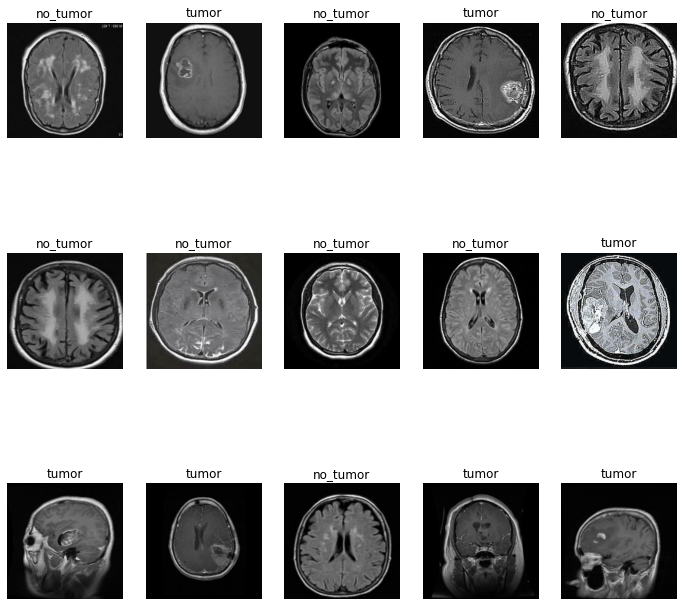

In [4]:
# Lets take a look at some samples.
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path)
plt.figure(figsize=(12,12))
for img, labels in train_data.take(1):
    for i in range(15): 
        plt.subplot(3, 5, i + 1)
        plt.imshow(np.squeeze(img[i].numpy().astype('uint8')))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [5]:
# Calling the image data generator to load in the train/validation/testing directories
train_set = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,
                         target_size=(224,224),
                         classes=['no_tumor', 'tumor'],
                         batch_size=10, shuffle = True)


valid_set = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,
                         target_size=(224,224),
                         classes=['no_tumor', 'tumor'],
                         batch_size=10, shuffle = True)


test_set = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,
                         target_size=(224,224),
                         classes=['no_tumor', 'tumor'],
                         batch_size=10, shuffle=False)

Found 2400 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Model Development

In [6]:
# Using the Sequential API with one input and one output
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), # Adam is the optimizer
              loss='categorical_crossentropy', # Since I choose softmax with 2 nodes in the CNN architecture
              metrics=['accuracy']) # Evaluation Metric

# 4. Training

In [8]:
# Train the model
model.fit(x=train_set,
          validation_data = valid_set,
          epochs = 10,
          verbose = 2)  

Epoch 1/10
240/240 - 22s - loss: 2.8085 - accuracy: 0.7579 - val_loss: 0.8336 - val_accuracy: 0.8560
Epoch 2/10
240/240 - 16s - loss: 0.2911 - accuracy: 0.9146 - val_loss: 0.3943 - val_accuracy: 0.8900
Epoch 3/10
240/240 - 16s - loss: 0.1020 - accuracy: 0.9658 - val_loss: 0.3238 - val_accuracy: 0.9160
Epoch 4/10
240/240 - 16s - loss: 0.0484 - accuracy: 0.9825 - val_loss: 0.7500 - val_accuracy: 0.8640
Epoch 5/10
240/240 - 16s - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.3039 - val_accuracy: 0.9420
Epoch 6/10
240/240 - 16s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3260 - val_accuracy: 0.9420
Epoch 7/10
240/240 - 19s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3106 - val_accuracy: 0.9440
Epoch 8/10
240/240 - 16s - loss: 7.2459e-04 - accuracy: 1.0000 - val_loss: 0.3259 - val_accuracy: 0.9340
Epoch 9/10
240/240 - 16s - loss: 5.4171e-04 - accuracy: 1.0000 - val_loss: 0.3255 - val_accuracy: 0.9380
Epoch 10/10
240/240 - 16s - loss: 4.3089e-04 - accuracy: 1.0000 - val_loss: 0.3250 

# 5. Testing/Evaluation

In [14]:
def model_evaluation(model, test_data):
    
    result = model.evaluate(test_set)
    print("Loss:  " + "%.4f" % result[0])
    print("Acuracy:  " + "%.4f" % result[1])
    
    predictions = model.predict(x=test_set, verbose=0)
    y_pred=np.argmax(predictions, axis=-1)
    cm = confusion_matrix(test_data.labels, y_pred)
    names = ['True Neg','False Pos','False Neg','True Pos']
    count = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,count,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    

    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=labels, fmt='', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["Negative", "Positive"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    print("Classification Report:\n\n", clr)

100/100 [==============================] - 6s 61ms/step - loss: 0.2834 - accuracy: 0.9480
Loss:  0.2834
Acuracy:  0.9480


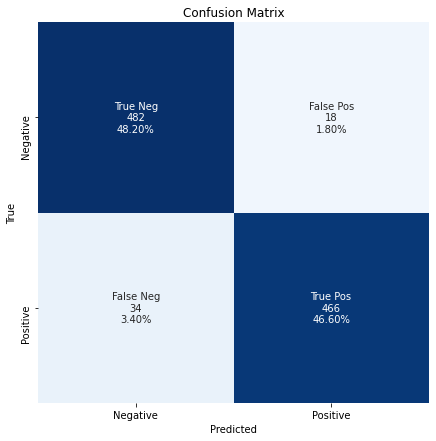

Classification Report:

               precision    recall  f1-score   support

    NEGATIVE       0.93      0.96      0.95       500
    POSITIVE       0.96      0.93      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [16]:
model_evaluation(model, test_set)